### Import libraries

In [1]:
from PIL import Image
import numpy as np
from scipy.io import savemat
import os
import matplotlib.pyplot as plt
import math

### Create a function to store the images as a matrix

In [2]:
def process_images(input_folder, output_file):   
    image_files = [f for f in os.listdir(input_folder)]
    grayscale_matrices = []
    
    for image_file in image_files:
        
        image = Image.open(os.path.join(input_folder, image_file))
        image = image.resize((168, 168))
        grayscale_array = np.array(image.convert('L'))
        grayscale_matrices.append(grayscale_array)
    grayscale_matrices = np.array(grayscale_matrices)
    savemat(output_file, {"grayscale_matrices": grayscale_matrices})
    return grayscale_matrices
    
output_file = "faceImage.mat"
input_folder = "./Data"
grayscale_matrices = process_images(input_folder, output_file)


### Determine the width and height

In [3]:
height =  len( grayscale_matrices[0])
width = len( grayscale_matrices[0][0])
num_Image = len(grayscale_matrices)
print(width, height)


168 168


### Flatten the array

In [4]:
num_images = len(grayscale_matrices)
height, width = grayscale_matrices[0].shape  # Assuming all images have the same dimensions
vector_size = width * height
image_matrix = np.empty((num_images, vector_size), dtype=np.uint8)

for i in range(num_images):
    image_vector = grayscale_matrices[i].flatten()
    image_matrix[i] = image_vector


### Calculate the mean

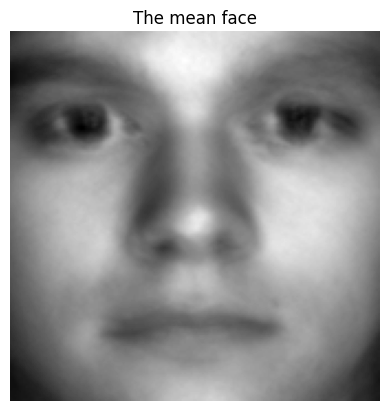

In [5]:
mean_along_cols = np.mean(image_matrix, axis=0)
mean_face = mean_along_cols.reshape(height,width)
plt.figure()
plt.imshow(mean_face.astype(np.uint8), cmap='gray')
plt.title("The mean face")
plt.axis('off') 
plt.show()

### Subtract the mean from the flattened image

In [6]:
image_matrix_centered = image_matrix - mean_along_cols
test_image = image_matrix_centered[0]

### Calculate the covariance vector

In [7]:
covariance_matrix = np.dot(image_matrix_centered, image_matrix_centered.T)

### Find the  Eigenvalues and Eigen Vectors

In [8]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

### Calculate the projection on to the eigenspace

In [9]:
Eigen_space = np.dot(image_matrix_centered.T, eigenvectors)
projected_data = np.dot(Eigen_space.T, image_matrix_centered.T)
# print(projected_data)

### Display the eigenfaces

In [10]:
# for i in range(num_Image):
#     eigen_face = Eigen_space.T[i]
#     eigen_face = eigen_face.reshape(height, width)
#     plt.figure()
#     plt.imshow(eigen_face.astype(np.uint8), cmap='gray')
#     plt.title(f"Eigen Face {i+1}")
#     plt.show()

### Calculate the threshold

In [11]:
def PCA(projected_data):
    threshold = 0
    for i in range(len(projected_data)):
        for j in range(i + 1, len(projected_data)): 
            projection_i = projected_data[i]
            projection_j = projected_data[j]
            distance_ij = np.linalg.norm(projection_i - projection_j)
            threshold = max(threshold, distance_ij)
            
    threshold /= 2 
    return threshold

threshold = PCA(projected_data)
print(threshold)

695444662.4864011


### start the face recognition test

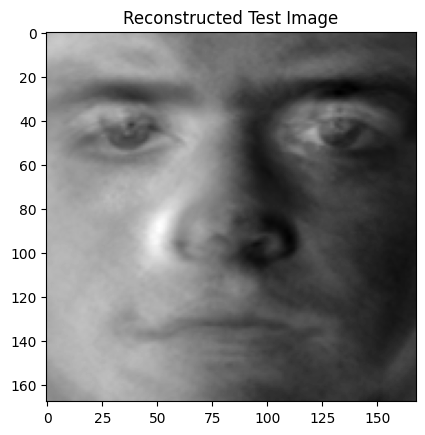

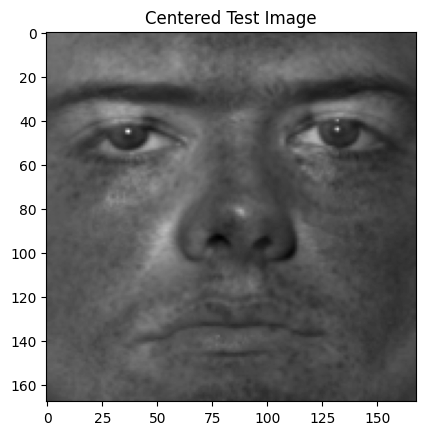

In [12]:
# def recognition(test_image, projected_data, Eigen_space):

test_projected_data = np.dot(Eigen_space.T, test_image.T)
distances = np.linalg.norm(test_projected_data - projected_data, axis=1)
reconstructed_test_image = np.dot(Eigen_space, test_projected_data)
reconstructed_test_image = reconstructed_test_image.reshape(width, height)


plt.imshow(reconstructed_test_image, cmap='gray')
plt.title('Reconstructed Test Image')
plt.show()

i = image_matrix_centered[0].reshape(width, height)
plt.imshow(i, cmap='gray')
plt.title('Centered Test Image')
plt.show()

In [13]:

reconstructedDistance = np.linalg.norm((test_image.reshape(width, height)) - reconstructed_test_image)

if reconstructedDistance ** 0.5 >= threshold:
    print("Not a face")
if reconstructedDistance ** 0.5 < threshold:
    if min(distances) ** 0.5 < threshold:
        print("New Face")
    elif min(distances) ** 0.5 >= threshold:
        print("Known Face")


New Face
